# Black Friday and Consumer Behaviors

I am a Python newbie and wanted to 
build portfolio from one of the shared datas from Kaggle. 
This may not be an accurate measure, I am just doing this to gain some experience. 

In [3]:
import pandas as pd
import numpy as np

In [4]:
open_file = '/Users/yoonee/Downloads/BlackFriday.xlsx'
file = pd.read_excel(open_file)
pd.DataFrame(file)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
user_id = file["User_ID"].unique()
print(user_id)
print(len(user_id))
    

[1000001 1000002 1000003 ... 1004113 1005391 1001529]
5891


# Unique Features

In [6]:
unique_features = file.apply(lambda x:x.nunique())
print(unique_features)
print('Number of Rows and Columns in Data Set:', file.shape)

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64
Number of Rows and Columns in Data Set: (537577, 12)


In [7]:
print('Highest and lowest purchase:',file['Purchase'].max(),',',file['Purchase'].min())

Highest and lowest purchase: 23961 , 185


Among the given features inside the table chart, unique values of <code>Product Category 1,2,and 3</code> seem to imply different types of products of one category. 

Some of the values were missing on <code> Product Category 2,3</code>. By counting the missing values,

In [8]:
total_miss = file.isnull().sum()
perc_miss = total_miss/file.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending = False).head(2)

,Total missing,% missing
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713


<code> Age</code> and <code>Years of residence </code> were broken into different groups; 

In [9]:
print('Years of residence:',file['Stay_In_Current_City_Years'].unique())
print('Age Groups:',file['Age'].unique())

Years of residence: [2 '4+' 3 1 0]
Age Groups: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


# Spending Analysis

The numbers in <code>Total Purchase</code> did not show in decimals. I will just divide each number into hundred to estimate how much each customer spent on their purchase

In [10]:
purchase = file['Purchase'].sum()
print('Total Purchase:', purchase/100)

Total Purchase: 50176683.78


The total customers spent on the products on Black Friday was <code>5017668378</code>. 
By dividing 5017668378 into hundred, it will be <code> $ 50,176,683.78</code>

# Number of Shoppers 

In [11]:
n_shoppers = file.groupby('User_ID').nunique()
print('Number of Shoppers on Black Friday:' ,len(n_shoppers))

Number of Shoppers on Black Friday: 5891


As I have mentioned earlier, there were 5891 shoppers on Black Friday. I believe that we should look into the demographics to grasp what type of customers spent the most during the holiday.We could further delve into the products the customers purchased, so we could take account of this to target the audience in the future. 

# Demographics 
- Gender Population 
- Gender Total Spending
- Gender Average Spending 


# Population by Gender 

In [12]:
female = file[file['Gender']=='F'].groupby('User_ID')['Gender'].nunique()
print('Total Number of Female Shoppers:',female.count())
male = file[file['Gender']=='M'].groupby('User_ID')['Gender'].unique()
print('Total Number of Male Shoppers:',male.count())

Total Number of Female Shoppers: 1666
Total Number of Male Shoppers: 4225


In [13]:
import matplotlib.pyplot as plt

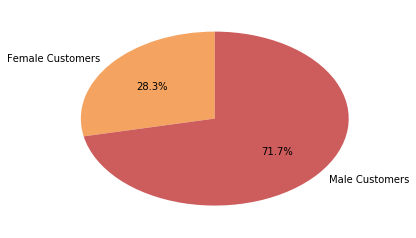

In [14]:
values = [1666, 4225]
gender = ['Female Customers', 'Male Customers']
color = ['sandybrown','indianred']
plt.pie(values, labels= gender, colors= color, startangle=90, autopct='%.1f%%')
plt.show()
                       

The pie chart displays the number of customers by gender; out of 5891 customers, there were more male customers than female customers on Black Friday.

# Total Spending and Average Spending 

In [15]:
gender_total = file.groupby('Gender').agg({'Purchase':np.sum})
divide = gender_total/100
print(divide)

           Purchase
Gender             
F       11646240.21
M       38530443.57


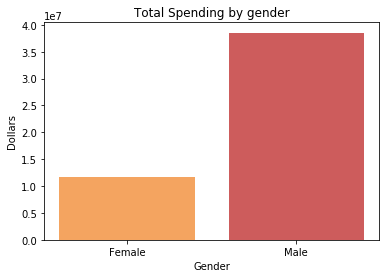

In [16]:
values = [11646240.21,38530443.57]
gender = ('Female', 'Male')
y_pos = np.arange(len(gender))
plt.title('Total Spending by gender')
plt.xlabel('Gender')
plt.ylabel('Dollars')

plt.bar(y_pos,values,color=['sandybrown','indianred'])
plt.xticks(y_pos,gender)
plt.show()


In [17]:
gender_spent= file.groupby('Gender').agg({'Purchase':np.mean})
gender_avg = gender_spent/100
print(gender_avg)

         Purchase
Gender           
F       88.097613
M       95.047717


Despite the fact that the number of male customers were significiantly higher than female customers, their total spending and average spending do not have a big gap between them. It's possible to imply that each female customer has high spending as much as male customer

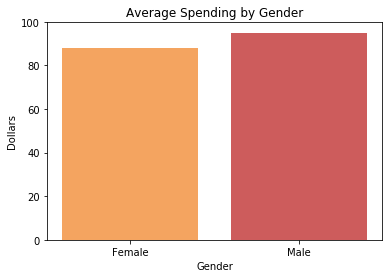

In [18]:
average_spending = [88.0976,95.0477]
by_gender = ['Female','Male']
y_axis = np.arange(len(by_gender))
plt.title('Average Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Dollars')
plt.bar(y_axis,average_spending,color=['sandybrown','indianred'])
plt.xticks(y_axis,by_gender)
plt.show()

# Age Groups

In [19]:
# Number of Shoppers by Age Groups 

teen = file[file['Age']== '0-17'].groupby('User_ID')['Age'].nunique()
print('Age 0-17:', len(teen))

twenty = file[file['Age']=='18-25'].groupby('User_ID')['Age'].nunique()
print('Age 18-25:', len(twenty))

thirties = file[file['Age']=='26-35'].groupby('User_ID')['Age'].nunique()
print('Age 26-35:', len(thirties))

fourties = file[file['Age']=='36-45'].groupby('User_ID')['Age'].nunique()
print('Age 36-45:', len(fourties))

fifty = file[file['Age']== '46-50'].groupby('User_ID')['Age'].nunique()
print('Age 46-50:', len(fifty))

fifties = file[file['Age']=='51-55'].groupby('User_ID')['Age'].nunique()
print('Age 51-55:',len(fifties))

plus = file[file['Age']== '55+'].groupby('User_ID')['Age'].nunique()
print('Age 55+:',len(plus))


Age 0-17: 218
Age 18-25: 1069
Age 26-35: 2053
Age 36-45: 1167
Age 46-50: 531
Age 51-55: 481
Age 55+: 372


In [20]:
# use this example 
import plotly
from plotly.offline import plot
import plotly.graph_objs as go

In [21]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [22]:
init_notebook_mode(connected=True)

In [23]:
labels = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
values = [218,1069,2053,1167,531,481,372]
colors = ['#FEBFB3', 'lavender', 'skyblue', 'cornflowerblue','indianred','gold','tan']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors,line=dict(color='#000000', width=2)))

plotly.offline.iplot([trace], filename='styled_pie_chart')


In [24]:
age_purchase = file.groupby('Age').agg({'Purchase':np.sum})
print((age_purchase)/100)

          Purchase
Age               
0-17    1326590.06
18-25   9016692.80
26-35  19997491.06
36-45  10106495.65
46-50   4134182.23
51-55   3619083.56
55+     1976148.42


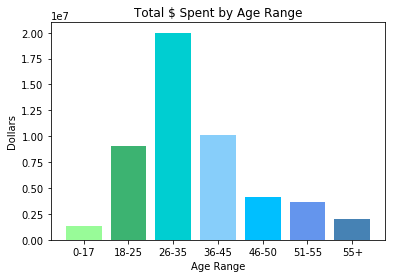

In [25]:
spending = [1326590,9016692,19997491,10106495,4134182,3619083,1976148]
by_age = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
y_axis = np.arange(len(by_age))
plt.title('Total $ Spent by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Dollars')
plt.bar(y_axis,spending,color=['palegreen','mediumseagreen','darkturquoise','lightskyblue','deepskyblue','cornflowerblue','steelblue'])
plt.xticks(y_axis,by_age)
plt.show()

Based on the data, age range from <code>26-35</code> spent the most out of all age ranges. While group <code>26-35</code> spent around 20 million dollars, groups from <code> 18-25 </code> and <code> 35-46 </code> have spent from 9 million to 10 million dollars. 

In [26]:
age_purchase = file.groupby('Age').agg({'Purchase':np.mean})
print(age_purchase/100)

        Purchase
Age             
0-17   90.201269
18-25  92.351976
26-35  93.145890
36-45  94.014788
46-50  92.848723
51-55  96.206166
55+    94.538986


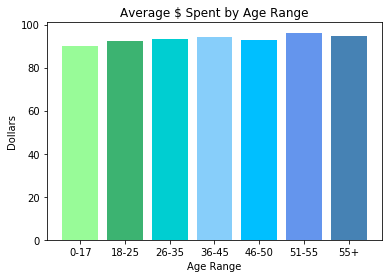

Average spending: 93.32571428571428


In [27]:
avg_spending = [90.20,92.35,93.14,94.01,92.84,96.20,94.54]
by_age = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
y_axis = np.arange(len(by_age))
plt.title('Average $ Spent by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Dollars')
plt.bar(y_axis,avg_spending,color=['palegreen','mediumseagreen','darkturquoise','lightskyblue','deepskyblue','cornflowerblue','steelblue'])
plt.xticks(y_axis,by_age)
plt.show()
print('Average spending:',sum(avg_spending) / len(avg_spending))

# Gender and Age Group

As I mentioned earlier, I divided 100 for each purchase. 
However, if you look at the average eage group's age range, most of the groups spent average around $93. Group <code> 51-55 </code> seems to have spent slightly more than other groups in average spending.  

In [28]:
population = file.groupby(['Gender','Age'])['User_ID'].nunique()
print(population)

Gender  Age  
F       0-17       78
        18-25     287
        26-35     545
        36-45     333
        46-50     182
        51-55     142
        55+        99
M       0-17      140
        18-25     782
        26-35    1508
        36-45     834
        46-50     349
        51-55     339
        55+       273
Name: User_ID, dtype: int64


In [29]:
fig = {
    'data': [
        {
            'labels': ['0-17', '18-25', '26-35', '36-45', '46-50','51-55','55+'],
            'values': [78,287,545,333,182,142,99],
            'type': 'pie',
            'name': 'Female Age Group',
            'marker': {'colors': ['rgb(56, 75, 126)',
                                  'rgb(18, 36, 37)',
                                  'seagreen',
                                  'cadetblue',
                                  'rgb(6, 4, 4)']},
            'domain': {'x': [0, .75],
                       'y': [0, .75]},
            'hoverinfo':'label+percent+name',
            'textinfo':'value' 
        },
        {
            'labels': ['0-17', '18-25', '26-35', '36-45', '46-50','51-55','55+'],
            'values': [140, 782, 1508, 834,349, 339, 273],
            'marker': {'colors': ['rgb(177, 127, 38)',
                                  'rgb(205, 152, 36)',
                                  'rgb(99, 79, 37)',
                                  'rgb(129, 180, 179)',
                                  'rgb(124, 103, 37)']},
            'type': 'pie',
            'name': 'Male Age Group',
            'domain': {'x': [0.5, 1],
                       'y': [0, .75]},
            'hoverinfo':'label+percent+name',
            'textinfo':'value'

        }], 'layout': {'title':'Number of Shoppers by Gender and Age Group',
               'showlegend': True},
}

plotly.offline.iplot(fig, filename='styled_pie_chart')

Among the age groups, age group<code> 26-35 </code> had the most customers.

In [30]:
compare = file.groupby(['Gender','Age'])['Purchase'].mean()
edit = compare/100
print(edit)
print('Highest Average Spent:',max(edit))
print('Least Average Spent:', min(edit))

Gender  Age  
F       0-17     84.447032
        18-25    84.054309
        26-35    87.917987
        36-45    90.465738
        46-50    89.294487
        51-55    91.314518
        55+      91.195772
M       0-17     93.123222
        18-25    95.065011
        26-35    94.706211
        36-45    95.171263
        46-50    94.291516
        51-55    97.890205
        55+      95.570581
Name: Purchase, dtype: float64
Highest Average Spent: 97.89020475986277
Least Average Spent: 84.05430851727148


In [31]:
x = ['0-17', '18-25','26-35','36-45','46-50','51-55','55+']
y_female= [84.44, 84.05, 87.91, 90.47, 89.29, 91.31, 91.2]
y_male = [93.12, 95.07, 94.71, 95.17, 94.29, 97.89, 95.57]

trace1 = go.Bar(
    x=x,
    y= y_female,
    text= y_female, 
    textposition = 'auto',
    name = 'Female Age Group',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

trace2 = go.Bar(
    x=x,
    y=y_male,
    text=y_male,
    textposition = 'auto',
    name = 'Male Age Group',
    marker=dict(
        color='rgb(58,200,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    opacity=0.6
)

data = [trace1,trace2]
layout = {'xaxis': {'title':'Age Group'},
          'yaxis':{'title': 'Dollars in USD'},
          'title':'Average Dollars Spent by Gender and Age Group'};

plotly.offline.iplot({'data':data, 'layout':layout}, filename='grouped-bar-direct-labels')

Despite the fact that <code>26-35</code> had the most customers on Black Friday, that age group <code> 51-55 </code> had higher average spendings compared to other groups. 

# Occupation 

In [32]:
occupation = file.groupby(['Occupation'])['User_ID'].nunique()
print(occupation)

Occupation
0     688
1     517
2     256
3     170
4     740
5     111
6     228
7     669
8      17
9      88
10    192
11    128
12    376
13    140
14    294
15    140
16    235
17    491
18     67
19     71
20    273
Name: User_ID, dtype: int64


In [33]:
occupation.unique()

array([688, 517, 256, 170, 740, 111, 228, 669,  17,  88, 192, 128, 376,
       140, 294, 235, 491,  67,  71, 273])

In [34]:
trace0 = go.Bar(
    x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21],
    y=[688, 517, 256, 170, 740, 111, 228, 669,17, 88, 192, 128, 376,
       140, 294, 235, 491, 67, 71, 273],
    marker=dict(
        color=['rgba(204,204,204,1)', 'rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               'steelblue','lightblue']),
)

data = [trace0]
layout = go.Layout(
    title='Numbers by Occupation',
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='color-bar')

In [35]:
#Because it is a large dataset, there are so many ways to interpret this.
#Occupation and Purchase
# City and Purchase
# Stay in Current city and Purchase

#Occupation and product categories
#Gender and product categories
# Age group and Product Categories

# Finding Correlation 

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
import seaborn as sns 

In [38]:
file['Stay_In_Current_City_Years'].unique()

array([2, '4+', 3, 1, 0], dtype=object)

In [39]:
file.Stay_In_Current_City_Years.values

array([2, 2, 2, ..., 1, 1, 1], dtype=object)

In [40]:
gender_change = {'F':1,'M':2}
age_change = {'0-17':0, '18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6 }
city_change = {'A':1,'B':2,'C':3}
resident_change = {'4+': 4}
current_data = file.replace({'Gender':gender_change,'Age':age_change,'City_Category':city_change, 'Stay_In_Current_City_Years':resident_change})

In [41]:
file = current_data
file.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0,10,1,2,0,3,NaN,NaN,8370
1,1000001,P00248942,1,0,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0,10,1,2,0,12,NaN,NaN,1422
3,1000001,P00085442,1,0,10,1,2,0,12,14.0,NaN,1057
4,1000002,P00285442,2,6,16,3,4,0,8,NaN,NaN,7969
5,1000003,P00193542,2,2,15,1,3,0,1,2.0,NaN,15227
6,1000004,P00184942,2,4,7,2,2,1,1,8.0,17.0,19215
7,1000004,P00346142,2,4,7,2,2,1,1,15.0,NaN,15854
8,1000004,P0097242,2,4,7,2,2,1,1,16.0,NaN,15686
9,1000005,P00274942,2,2,20,1,1,1,8,NaN,NaN,7871


In [42]:
stats_purchase = file.Purchase.describe()


In [43]:
print(stats_purchase/100)

count    5375.770000
mean       93.338599
std        49.810221
min         1.850000
25%        58.660000
50%        80.620000
75%       120.730000
max       239.610000
Name: Purchase, dtype: float64


In [44]:
from scipy.stats import expon

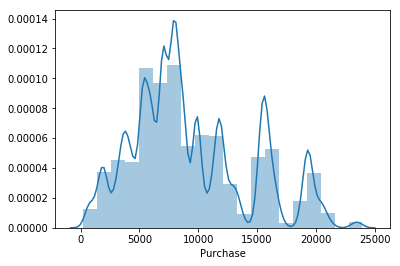

In [45]:
# This is Purchase distribution 
sns.distplot(file.Purchase, bins = 20,kde = True, rug = False)

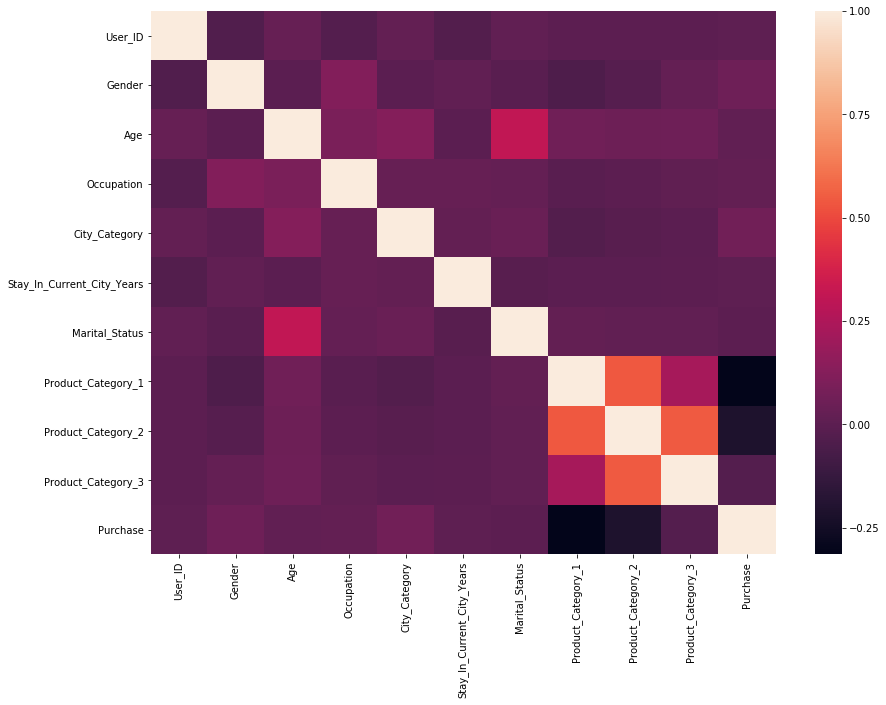

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

ax=sns.heatmap(file.corr())

# Predicting Purchase

In [47]:
data_frame = file[['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Stay_In_Current_City_Years','Purchase']]

In [48]:
X = data_frame.drop('Purchase',axis = 1)
y = data_frame['Purchase']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print('X train:',X_train.shape)
print('X test:',X_test.shape)
print('y train:',y_train.shape)
print('y test:',y_test.shape)

X train: (376303, 7)
X test: (161274, 7)
y train: (376303,)
y test: (161274,)


In [51]:
from sklearn.metrics import accuracy_score 
accuracy_score(

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets